# Life Expectancy and Gross Domestic Product (GDP)

## Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:
+ What is the average life expectancy in these nations?
+ What is the average GDP in these nations?
+ How has life expectancy changed over time in the six nations?
+ How has GDP changed over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
  
**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Modules

First, we will import the libraries needed for this project

In [192]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Explore the Data

Next, we can load the data into the `DataFrame` so that the data can be investigated and visualized.

The name of the `DataFrame` will be `gdp_life_exp` and we will take a look at the first five records of the `DataFrame`.

In [195]:
#read data file
gdp_life_exp = pd.read_csv("all_data.csv")
gdp_life_exp.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


It seems that there are 96 observations or rows and 4 columns.

In [197]:
gdp_life_exp.shape

(96, 4)

There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [199]:
countries = gdp_life_exp.Country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

## Data Analysis

We will first explore the average Life Expectancy at Birth and GDP for each country.

In [202]:
avg_life_exp = gdp_life_exp.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()
avg_life_exp

,Country,Life expectancy at birth (years)
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,United States of America,78.06250
5,Zimbabwe,50.09375


In [203]:
avg_gdp = gdp_life_exp.groupby('Country')['GDP'].mean().reset_index()
avg_gdp

,Country,GDP
0,Chile,1.697888e+11
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,United States of America,1.407500e+13
5,Zimbabwe,9.062580e+09


Now that the average values for Life Expectancy and GDP is determined for each country, bar plots showing the mean values for each variable are created below.

The first plot is average Life Expectancy for all the countries. The Average Life Expectancy for all countries except for Zimbabwe is in the mid-to-high 70s while Zimbabwe is around 50.

Text(0.5, 1.0, 'Average Life Expectancy at Birth (years)')

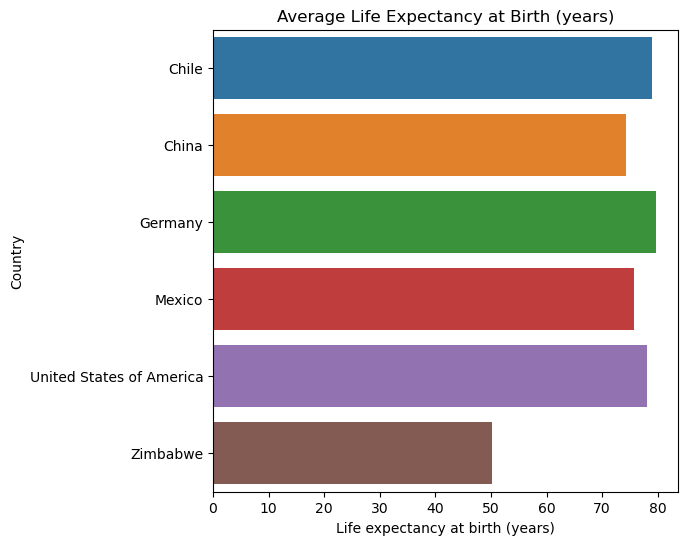

In [205]:
plt.figure(figsize=(6,6))
sns.barplot(x="Life expectancy at birth (years)",y="Country", hue="Country", data=avg_life_exp)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("Country")
plt.title("Average Life Expectancy at Birth (years)")

For the average GDP by Country, it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. China, Germany and Mexico seem to be relatively close (approximately 0.1 and 0.6 Trillions of US Dollars).

Text(0.5, 1.0, 'Average GDP (Trillions of US Dollars)')

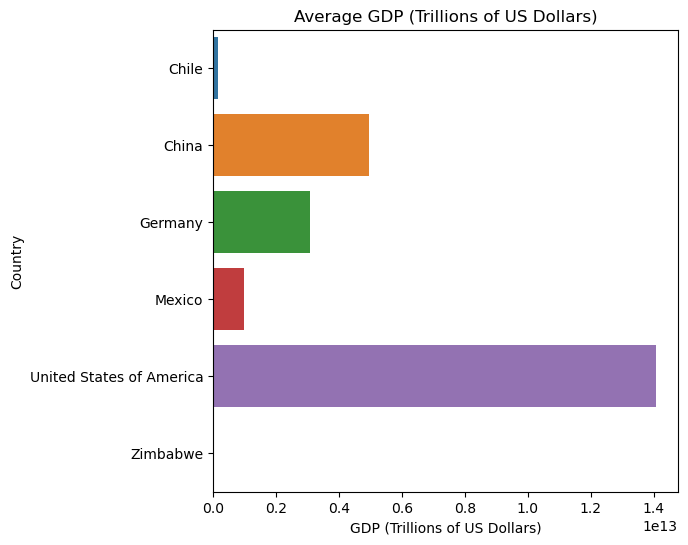

In [207]:
plt.figure(figsize=(6,6))
sns.barplot(x="GDP",y="Country", hue="Country", data=avg_gdp)
plt.xlabel("GDP (Trillions of US Dollars)")
plt.ylabel("Country")
plt.title("Average GDP (Trillions of US Dollars)")

The next chart will explore the Life Expectancy at Birth over the years for all six countries. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the significant increase after a dip around 2004.

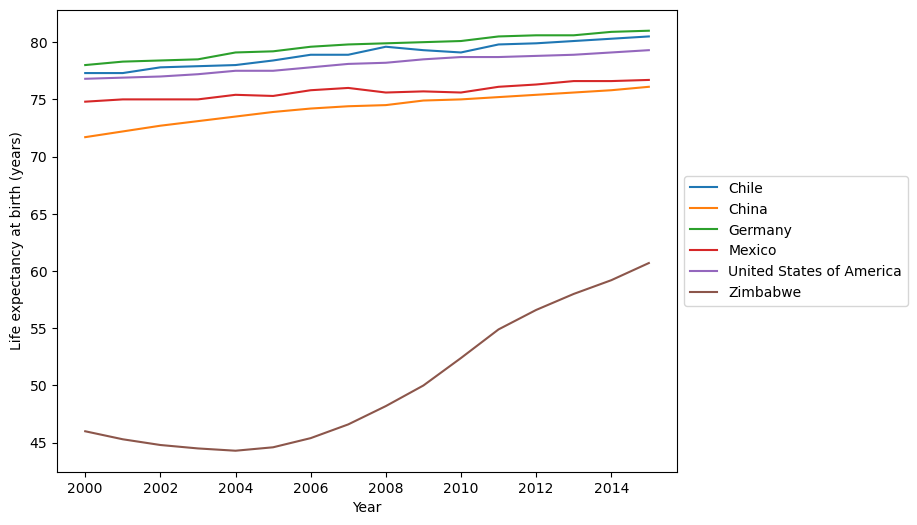

<Figure size 640x480 with 0 Axes>

In [209]:
plt.figure(figsize=(8,6))
sns.lineplot(x=gdp_life_exp.Year, y=gdp_life_exp['Life expectancy at birth (years)'], hue=gdp_life_exp.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

The plot below breaks out life expectancy by country. This plot gives us a clearer picture of the life expectancy over time. Chile, and Mexico seem to have dips in their life expectancy around the same time (around 2010) which could be looked into further. The other countries (apart from Zimbabwe) shows an increase but is not as smooth as they appear in the plot above.

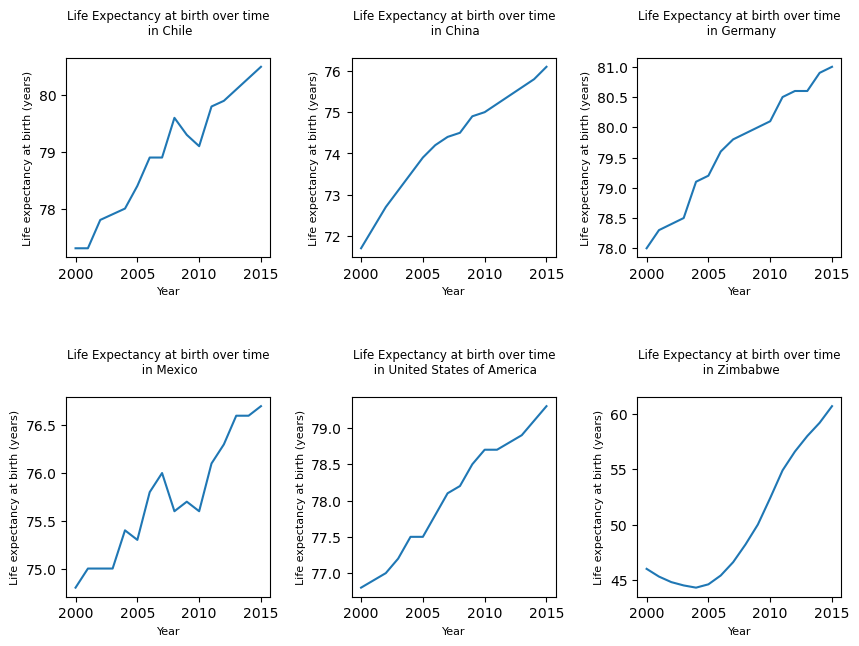

In [211]:
fig = plt.figure(figsize=(10,7))
i = 1
#Create a loop
for country in countries:
    
    ax=plt.subplot(2,3,i)
    Curr_country = gdp_life_exp[gdp_life_exp.Country == country]
    sns.lineplot(x="Year", y="Life expectancy at birth (years)",data = Curr_country)
    plt.xlabel('Year',size = 8)    
    plt.ylabel('Life expectancy at birth (years)',size = 8)
    plt.title('Life Expectancy at birth over time\n in ' + country + '\n', size = 8.5) 
    i+=1
    plt.subplots_adjust(wspace=0.4,hspace=0.7)

The chart below will explore the GDP over the years for all six countries. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

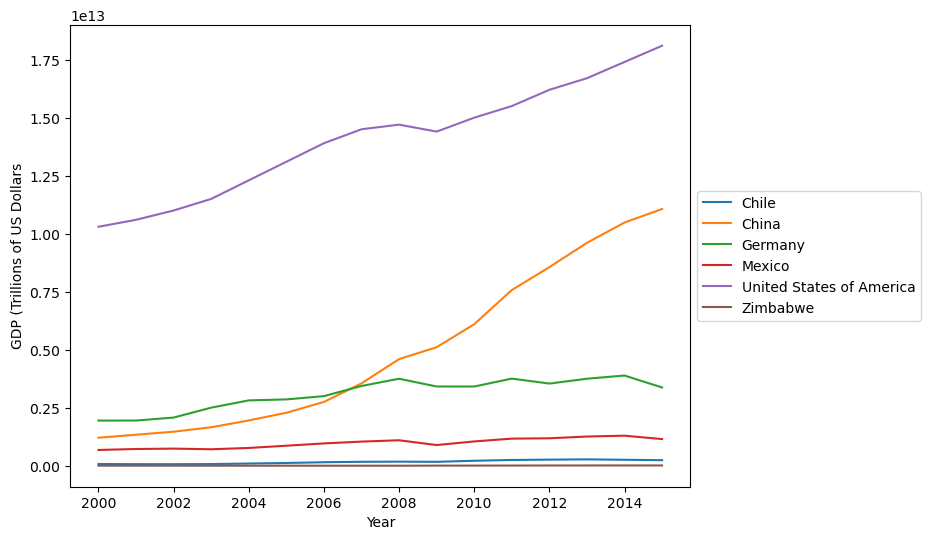

<Figure size 640x480 with 0 Axes>

In [213]:
plt.figure(figsize=(8,6))
sns.lineplot(x=gdp_life_exp.Year, y=gdp_life_exp['GDP'], hue=gdp_life_exp.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP (Trillions of US Dollars")
plt.show()
plt.clf()

In the individual plots, the other country's GDP growth looked insignificant compared to China and the US, but all of the countries did experience growth. All countries except for China experienced a dip between 2008-2010. This will need to be explored further. Could it be due to the recession? The GDP of Germany between 2008 and 2015 fluctuated quite a bit. Mexico, Chile and Germany all experienced a dip in 2015.

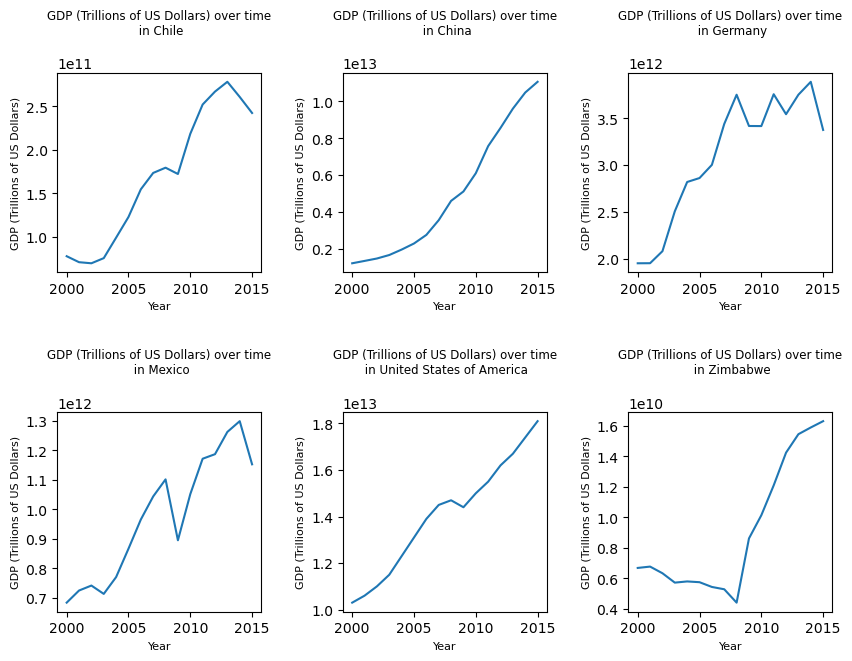

In [215]:
fig = plt.figure(figsize=(10,7))
i = 1
#Create a loop
for country in countries:
    
    ax=plt.subplot(2,3,i)
    Curr_country = gdp_life_exp[gdp_life_exp.Country == country]
    sns.lineplot(x="Year", y="GDP",data = Curr_country)
    plt.xlabel('Year',size = 8)    
    plt.ylabel('GDP (Trillions of US Dollars)',size = 8)
    plt.title('GDP (Trillions of US Dollars) over time\n in ' + country + '\n', size = 8.5) 
    i+=1
    plt.subplots_adjust(wspace=0.4,hspace=0.7)

In the chart below, GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

Text(0, 0.5, 'GDP (Trillions of US Dollars)')

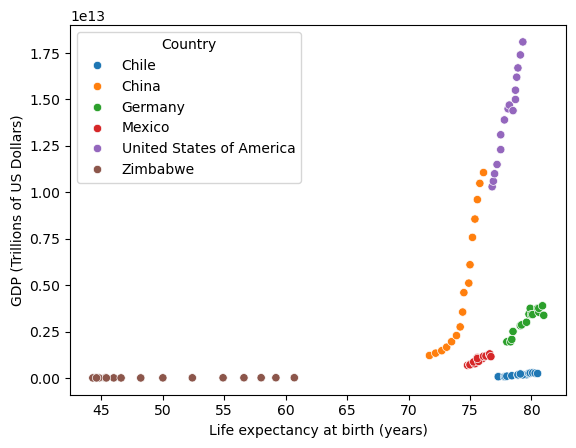

In [217]:
sns.scatterplot(x=gdp_life_exp['Life expectancy at birth (years)'], y=gdp_life_exp['GDP'], hue=gdp_life_exp.Country)
plt.ylabel('GDP (Trillions of US Dollars)')

Like the previous plots, countries are broken out into each scatter plot. Looking at the individual countries, most most countries have linear relationships between GDP and life expectancy. China, on the other hand, has a slightly exponential curve. Overall, the plots exhibit a positive correlation between GDP and Life Expectancy.

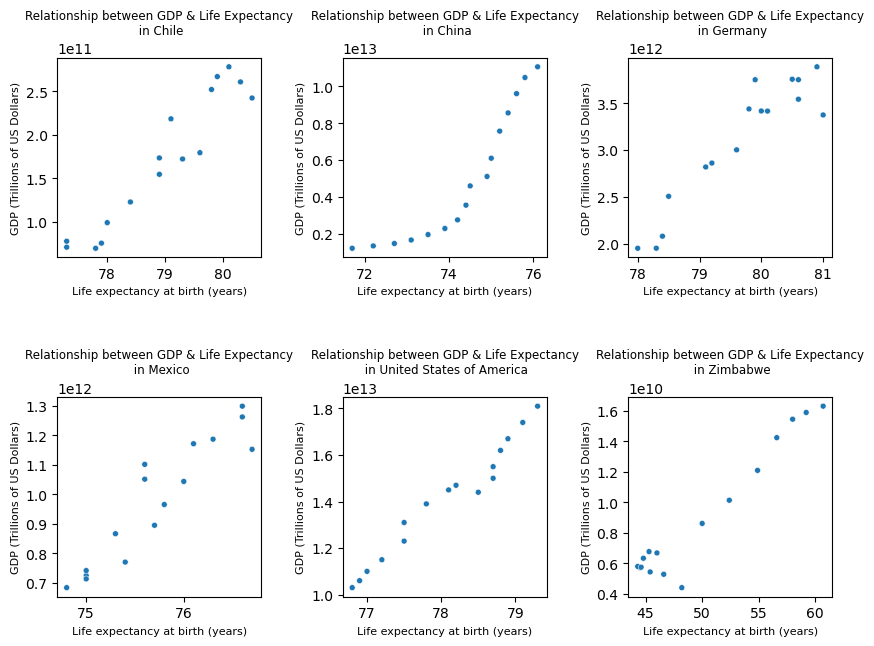

In [219]:
fig = plt.figure(figsize=(10,7))
i = 1
#Create a loop
for country in countries:
    
    ax1=plt.subplot(2,3,i)
    Curr_country = gdp_life_exp[gdp_life_exp.Country == country]
    sns.scatterplot(x="Life expectancy at birth (years)",y="GDP",data = Curr_country, size = 3, legend = False)
    plt.xlabel('Life expectancy at birth (years)',size = 8)
    plt.ylabel('GDP (Trillions of US Dollars)',size = 8)
    plt.title('Relationship between GDP & Life Expectancy\n in ' + country, size = 8.5)  
    i+=1
    
    plt.subplots_adjust(wspace=0.4,hspace=0.7)
   

## Conclusion

In this project, we were able to make quite a few data visualizations with the data.

We are also able to answer some of the questions posed in the beginning:

- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the average GDP in these nations?
    - US has a much higher value compared to the rest of the countries. Zimbabwe and Chile have a significantly lower average compared to the other countries.
- How has life expectancy changed over time in the six nations?
    - Life Expectancy has increased for all countries in our list, with Zimbabwe having the greatest increase.
- How has GDP changed over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a positive correlation between GDP and life expectancy for countries in our list.


## Further Analysis

+ Chile, and Mexico seem to have dips in their life expectancy around the same time (around 2010) which could be looked into further.
+ GDP over time has increased with a dip in most countries except China between 2008-2010. Could be due to recession. Would need to be explored further.